<a href="https://colab.research.google.com/github/thrishact/Automating-Loan-Approval-Decisions-System/blob/main/Automating_Loan_Approval_Decisions_with_Predictive_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural      

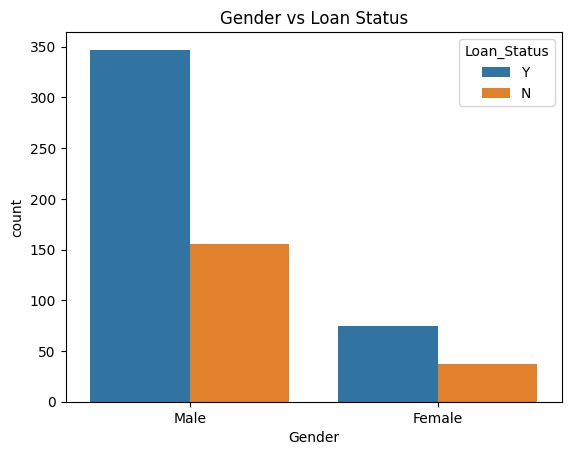

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Check again for NaNs:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Accuracy Score: 0.7642276422764228

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.7

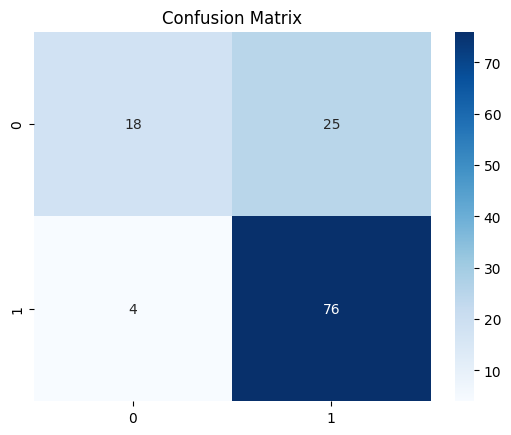

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Save model
import pickle
import warnings
warnings.filterwarnings('ignore');

# Load dataset
data = pd.read_csv('/content/loan-train.csv')
print("First 5 rows of the dataset:")
print(data.head())

# Fill categorical columns with mode (most frequent value)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill numerical column with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

# Handle special case in Dependents
data['Dependents'].replace('3+', 3, inplace=True)
data['Dependents'] = data['Dependents'].astype(int)  # Now it's safe to convert to integer

print("\nDataset Info:")
print(data.info())

print("\nMissing values:")
print(data.isnull().sum())

# Replace '3+' with 3 in the Dependents column
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)

# Fill missing values first
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

# Convert '3+' to 3 and cast the entire column to integer
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)


print("\nTarget variable distribution:")
print(data['Loan_Status'].value_counts())


data['Dependents'].replace('3+', 3, inplace=True)
data['Dependents'] = data['Dependents'].astype(int)

# Visualize categorical features
sns.countplot(x='Gender', hue='Loan_Status', data=data)
plt.title("Gender vs Loan Status")
plt.show()

print(data.isnull().sum())

print("Check again for NaNs:")
print(data.isnull().sum())  # All should be 0

# Fill missing values with most frequent or mean
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

# Label encode all categorical variables
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Features
y = data['Loan_Status']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Save trained model
with open('loan_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)